Sentiment table saved for control at datasets/combined/control_platform_sentiment.csv


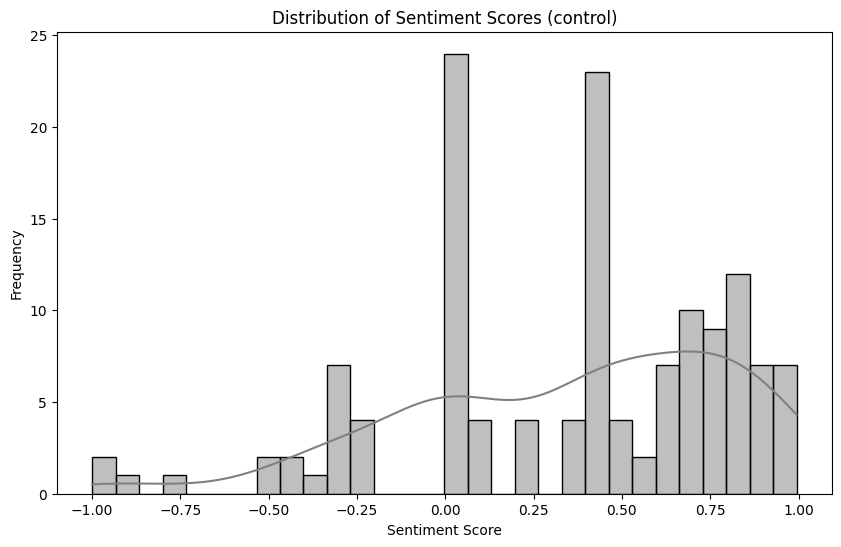

Average sentiment for control:
          Platform  sentiment
0         Facebook   0.416868
1   FacebookDirect   0.776600
2  InstagramDirect   0.916720
3           Rumble  -0.998900
4         Telegram   0.950150
5          Twitter   0.255049
6          YouTube   0.439971
Sentiment table saved for government at datasets/combined/government_platform_sentiment.csv


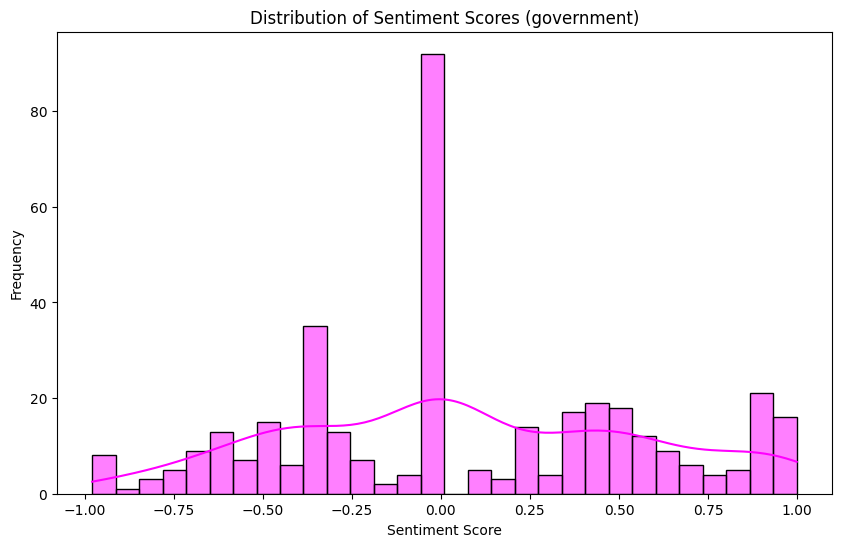

Average sentiment for government:
           Platform  sentiment
0           Bluesky   0.000000
1          Facebook   0.100905
2    FacebookDirect   0.314668
3             GETTR  -0.521100
4               Gab  -0.070233
5         Instagram   0.130890
6   InstagramDirect   0.174743
7          Telegram  -0.147600
8           Threads   0.021750
9            TikTok   0.406250
10      TruthSocial  -0.585900
11          Twitter  -0.019200
12          YouTube   0.343824
Sentiment table saved for nonprofit at datasets/combined/nonprofit_platform_sentiment.csv


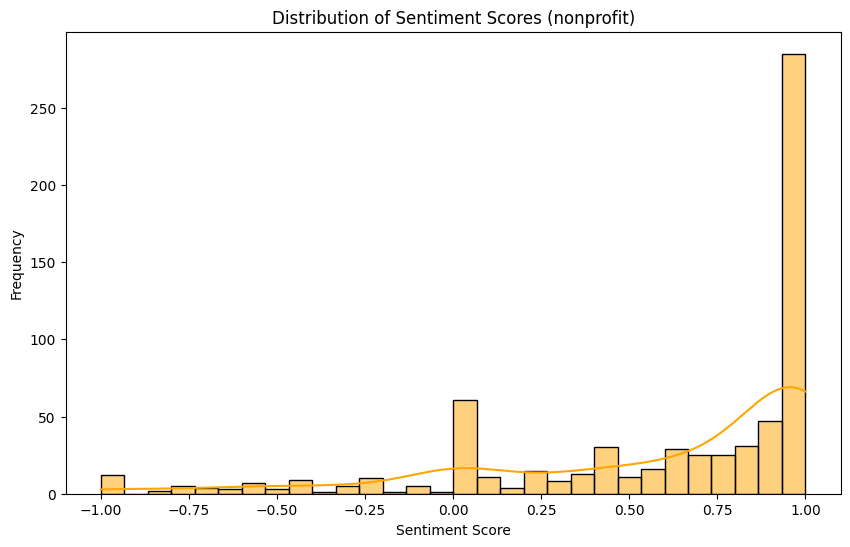

Average sentiment for nonprofit:
           Platform  sentiment
0           Bluesky   0.685150
1          Facebook   0.516203
2    FacebookDirect   0.630030
3               Gab   0.071650
4         Instagram   0.691450
5   InstagramDirect   0.784272
6           Podcast   0.930100
7            Rumble   0.886949
8          Telegram  -0.299700
9            TikTok   0.366900
10          Twitter   0.310242
11          YouTube   0.404465
Sentiment table saved for privateorg at datasets/combined/privateorg_platform_sentiment.csv


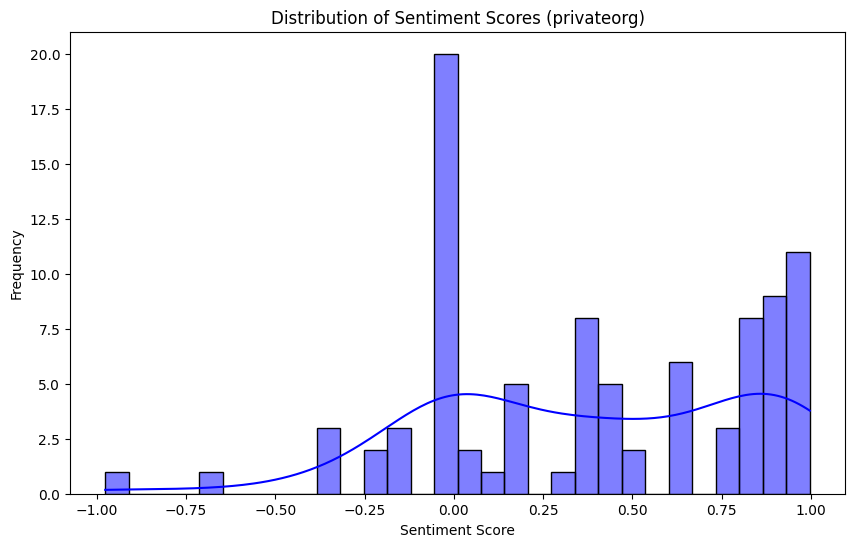

Average sentiment for privateorg:
          Platform  sentiment
0         Facebook   0.303522
1        Instagram   0.718420
2  InstagramDirect   0.905637
3           TikTok   0.670222
4          Twitter   0.221530
5          YouTube   0.278267


In [1]:
dataset = ['control','government','nonprofit','privateorg']

import csv  
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for organization types
color_map = {
    'nonprofit': 'orange',
    'government': 'magenta',  
    'privateorg': 'blue',
    'control': 'gray'  
}

for data in dataset:
    analyzer = SentimentIntensityAnalyzer()

    def get_sentiment_scores(text):
        if isinstance(text, str):
            return analyzer.polarity_scores(text)['compound']
        return None  

    input_csv = f'datasets/combined/{data}_combined.csv'
    df = pd.read_csv(input_csv, quotechar='"')

    df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

    output_csv = f'datasets/combined/{data}_combined_output.csv'
    df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)

    # Read CSV file
    df = pd.read_csv(output_csv)

    # Group by 'Platform' and calculate the average sentiment score
    avg_sentiment_df = df.groupby('Platform', as_index=False)['sentiment'].mean()

    # Save this table as CSV for future plotting
    sentiment_table_csv = f'datasets/combined/{data}_platform_sentiment.csv'
    avg_sentiment_df.to_csv(sentiment_table_csv, index=False)

    print(f'Sentiment table saved for {data} at {sentiment_table_csv}')

    # Plot sentiment distribution with assigned colors
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], bins=30, kde=True, color=color_map.get(data, 'black'))  
    plt.title(f'Distribution of Sentiment Scores ({data})')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')

    plt.savefig(f"graphs/{data}_Sentiment.jpeg", dpi=300)
    plt.show()

    print(f'Average sentiment for {data}:')
    print(avg_sentiment_df)



In [2]:
import pandas as pd

# Define the datasets
dataset = ['control', 'government', 'nonprofit', 'privateorg']

# Read and merge all sentiment data
merged_df = pd.DataFrame()  # Create an empty DataFrame to start with

for data in dataset:
    file_path = f'datasets/combined/{data}_platform_sentiment.csv'
    df = pd.read_csv(file_path)
    df['Organization_Type'] = data  # Add a column to indicate the organization type

    # Merge data
    if merged_df.empty:
        merged_df = df  # First dataset initializes the dataframe
    else:
        merged_df = pd.concat([merged_df, df], ignore_index=True)  # Append new data

# Save merged dataset
merged_output_csv = 'datasets/combined/merged_platform_sentiment.csv'
merged_df.to_csv(merged_output_csv, index=False)

print(f'Merged dataset saved at {merged_output_csv}')
print(merged_df.head())  # Show first few rows for verification


Merged dataset saved at datasets/combined/merged_platform_sentiment.csv
          Platform  sentiment Organization_Type
0         Facebook   0.416868           control
1   FacebookDirect   0.776600           control
2  InstagramDirect   0.916720           control
3           Rumble  -0.998900           control
4         Telegram   0.950150           control


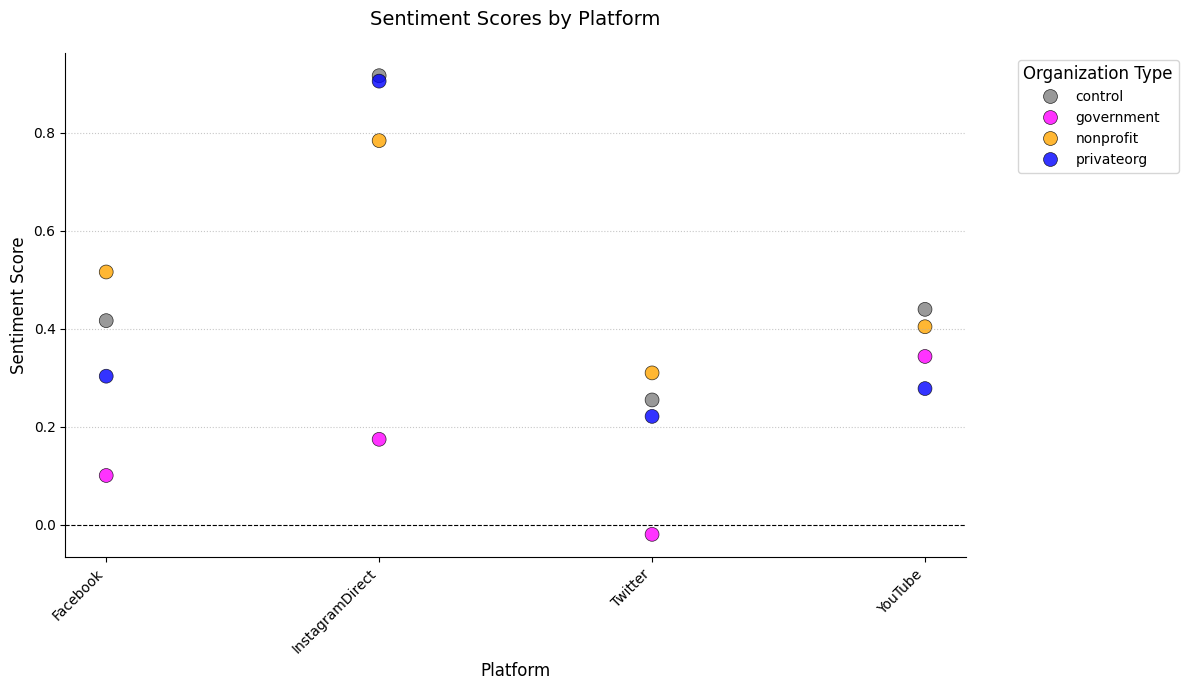

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged dataset
merged_csv = 'datasets/combined/merged_platform_sentiment.csv'
df = pd.read_csv(merged_csv)


# Filter platforms present in all 4 groups
platform_counts = df['Platform'].value_counts()
platforms_in_all_groups = platform_counts[platform_counts == 4].index.tolist()
filtered_df = df[df['Platform'].isin(platforms_in_all_groups)]

# Your custom color map
color_map = {
    'nonprofit': 'orange',
    'government': 'magenta',  
    'privateorg': 'blue',
    'control': 'gray'  
}

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=filtered_df,
    x='Platform',
    y='sentiment',
    hue='Organization_Type',
    palette=color_map,
    s=100,
    alpha=0.8,
    edgecolor='black',  # Add outline to markers
    linewidth=0.5
)

# Customize plot
plt.title('Sentiment Scores by Platform', fontsize=14, pad=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Neutral sentiment line
plt.legend(title='Organization Type', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':', alpha=0.7)
sns.despine()  # Remove top/right borders

plt.tight_layout()
plt.show()

Emotion

/Users/amanshaik/anaconda/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Saved: datasets/combined_with_emotions/control_with_emotions.csv
Saved: datasets/combined_with_emotions/government_with_emotions.csv
Saved: datasets/combined_with_emotions/nonprofit_with_emotions.csv
Saved: datasets/combined_with_emotions/privateorg_with_emotions.csv


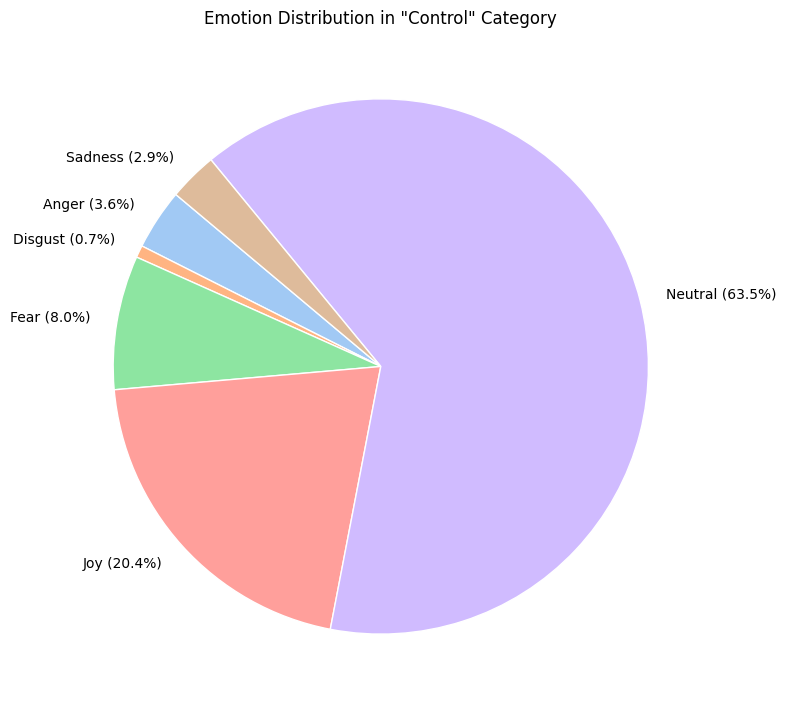

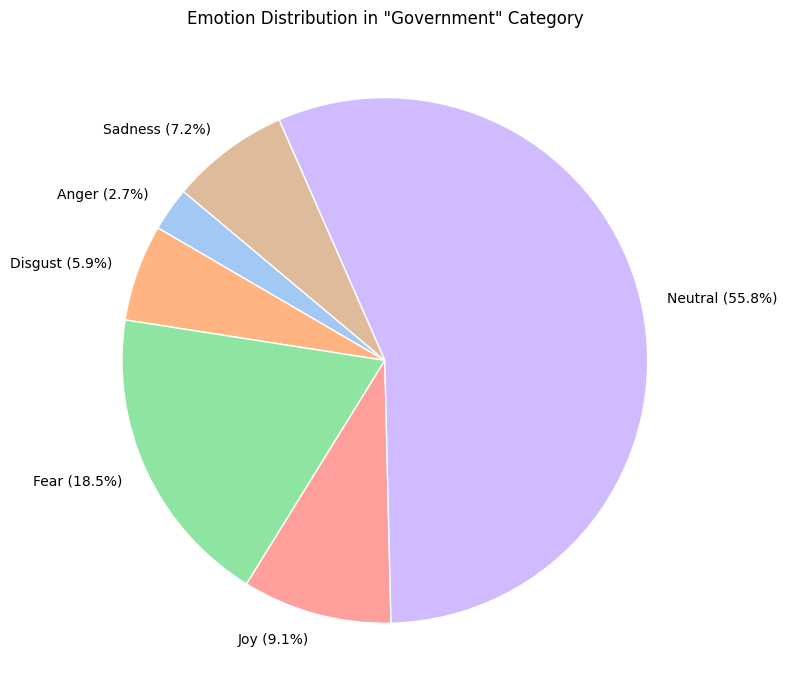

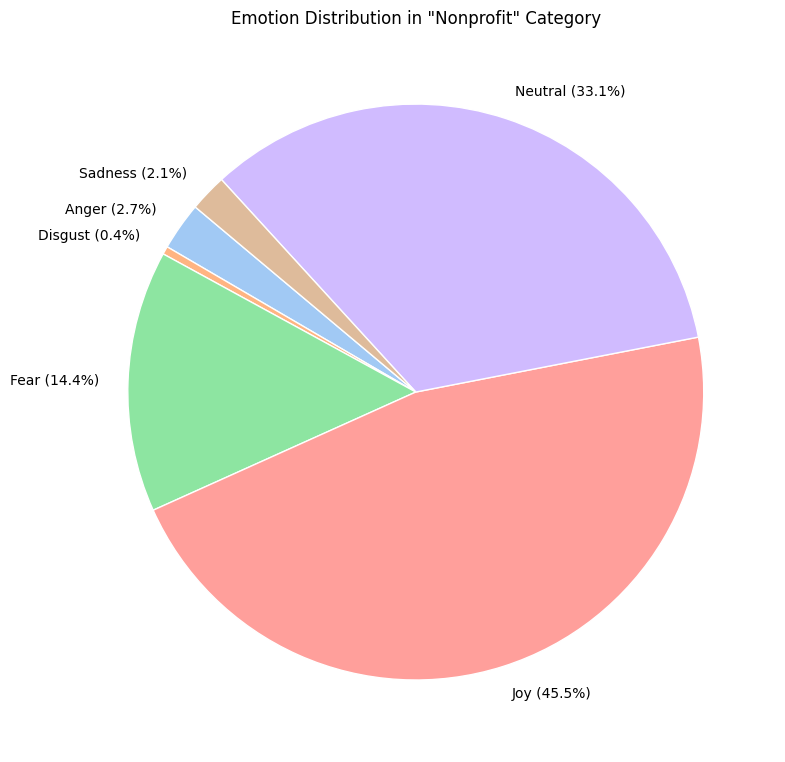

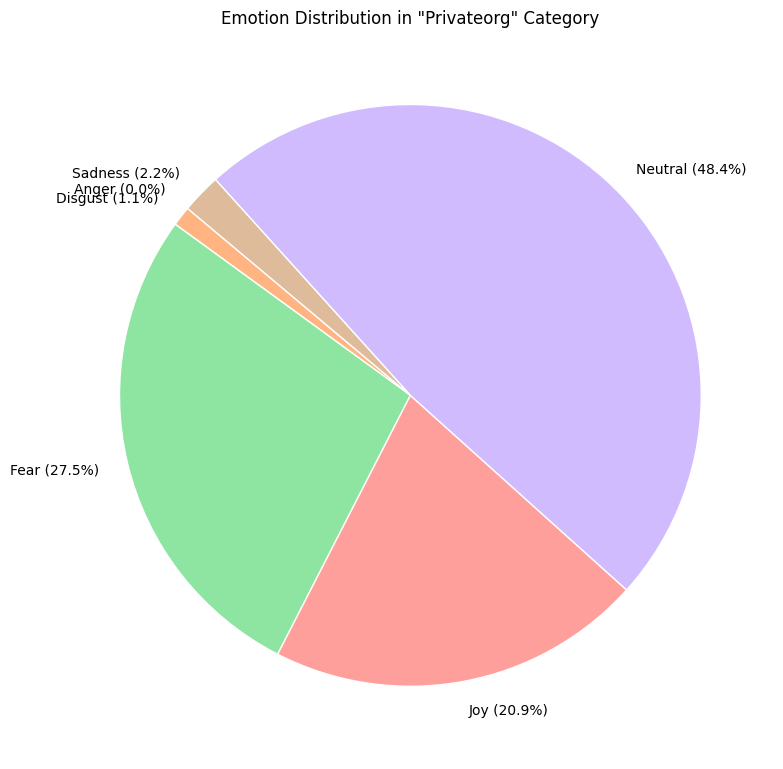

In [1]:

import csv  
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from collections import Counter, defaultdict

# Dataset categories
dataset = ['control', 'government', 'nonprofit', 'privateorg']

# Define color mapping for organization types
color_map = {
    'nonprofit': 'orange',
    'government': 'magenta',  
    'privateorg': 'blue',
    'control': 'gray'  
}

# Load emotion classification model
emotion_classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base", 
    return_all_scores=True
)

# Output directories
os.makedirs("graphs", exist_ok=True)
os.makedirs("datasets/combined_with_emotions", exist_ok=True)

# Emotion labels used by the model
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness"]

# Store emotion counts and total posts
emotion_counts = defaultdict(Counter)
total_posts = {}

# Analyze each dataset
for data in dataset:
    input_csv = f'datasets/combined/{data}_combined.csv'
    df = pd.read_csv(input_csv, quotechar='"')

    # Filter valid posts
    df = df[df['post_body_text'].apply(lambda x: isinstance(x, str) and x.strip() != "")]
    total_posts[data] = len(df)

    top_emotions = []

    # Apply emotion classifier
    for text in df['post_body_text']:
        try:
            results = emotion_classifier(text[:512])[0]  # limit input length
            top_emotion = max(results, key=lambda x: x['score'])['label']
            top_emotions.append(top_emotion)
            emotion_counts[data][top_emotion] += 1
        except Exception as e:
            print(f"Error processing text: {text[:50]}... — {e}")
            top_emotions.append("error")

    # Save post-level emotion label
    df['top_emotion'] = top_emotions
    output_labeled_csv = f"datasets/combined_with_emotions/{data}_with_emotions.csv"
    df.to_csv(output_labeled_csv, index=False, quoting=csv.QUOTE_ALL)
    print(f"Saved: {output_labeled_csv}")

# Convert counts to percentages
emotion_percentages = {}
for data in dataset:
    total = total_posts.get(data, 1)  # prevent divide by zero
    emotion_percentages[data] = {
        emotion: (emotion_counts[data][emotion] / total) * 100 for emotion in emotion_labels
    }

# Create DataFrame for plotting
emotion_df = pd.DataFrame(emotion_percentages).T[emotion_labels]
emotion_df.index.name = "Category"

# Generate pie charts
for category in emotion_df.index:
    plt.figure(figsize=(8, 8))
    
    values = emotion_df.loc[category]
    labels = [label.capitalize() for label in emotion_labels]
    colors = sns.color_palette("pastel")[0:len(emotion_labels)]

    plt.pie(
        values,
        labels=[f"{label} ({value:.1f}%)" for label, value in zip(labels, values)],
        colors=colors,
        autopct=None,
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )

    plt.title(f'Emotion Distribution in "{category.capitalize()}" Category')
    plt.tight_layout()
    plt.savefig(f"graphs/{category}_Emotion_PieChart.jpeg", dpi=300)
    plt.show()


In [6]:
import pandas as pd

control_emotion = pd.read_csv("datasets/combined_with_emotions/control_with_emotions.csv")
negative_emotions = control_emotion[control_emotion['top_emotion']=='sadness']
# negative_emotions.head()
result = negative_emotions[['post_body_text','top_emotion']]

result.head(10)
result.to_csv('sampleOutput.csv')


In [10]:
import plotly.graph_objects as go

# Define a consistent color map for emotions
emotion_labels = ['joy', 'sadness', 'anger', 'fear', 'surprise', 'disgust']  # Example emotions
color_map = {
    'joy': 'orange',       # gold
    'sadness': 'blue',   # dodgerblue
    'anger': 'red',     # orangered
    'fear': 'green',      # blueviolet
    'surprise': 'light blue',  # mediumspringgreen
    'disgust': 'grey'    # darkolivegreen
}

standard_colors = [color_map[label] for label in emotion_labels]

# Interactive pie charts with dropdown for each category
fig = go.Figure()

# Add one pie chart per category (only one shown at a time)
for i, category in enumerate(emotion_df.index):
    values = emotion_df.loc[category]
    labels = [label.capitalize() for label in emotion_labels]

    fig.add_trace(go.Pie(
        labels=labels,
        values=values,
        name=category.capitalize(),
        hoverinfo='label+percent',
        textinfo='label+percent',
        marker=dict(colors=standard_colors),
        visible=(i == 0)
    ))

# Create dropdown menu
dropdown_buttons = [
    {
        "label": cat.capitalize(),
        "method": "update",
        "args": [
            {"visible": [i == j for j in range(len(emotion_df.index))]},
            {"title": f"Emotion Distribution: {cat.capitalize()}"}
        ],
    }
    for i, cat in enumerate(emotion_df.index)
]

# Update layout
fig.update_layout(
    title="Emotion Distribution: Control",
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1,
        "xanchor": "left",
        "y": 1.2,
        "yanchor": "top"
    }],
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()
fig.write_html("emotionPlot.html")


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

emotion_df.to_csv('emotionDistributionResults.csv')
# Define emotions and color map
emotion_labels = ['joy', 'sadness', 'anger', 'fear', 'surprise', 'disgust']
color_map = {
    'joy': 'orange',
    'sadness': 'blue',
    'anger': 'red',
    'fear': 'green',
    'surprise': 'lightblue',
    'disgust': 'grey'
}
standard_colors = [color_map[label] for label in emotion_labels]

# Create 2x2 subplot grid
num_charts = len(emotion_df.index)
rows = 2
cols = 2

fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type':'domain'}]*cols]*rows,
    subplot_titles=[cat.capitalize() for cat in emotion_df.index]
)

# Add pie charts to subplots
for i, category in enumerate(emotion_df.index):
    row = i // cols + 1
    col = i % cols + 1
    values = emotion_df.loc[category]
    labels = [label.capitalize() for label in emotion_labels]

    fig.add_trace(go.Pie(
        labels=labels,
        values=values,
        name=category.capitalize(),
        marker=dict(colors=standard_colors),
        textinfo='label+percent',
        hoverinfo='label+percent',
        showlegend=(i == 0)  # show legend only once
    ), row=row, col=col)

# Update layout with shared legend
fig.update_layout(
    title_text="Emotion Distributions Across Categories",
    legend=dict(orientation="h", y=-0.1),
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()
fig.write_html("emotionPlot.html")


In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the CSV
df = pd.read_csv('emotionDistributionResults.csv')
emotions = df.columns[1:]

# Create a 2x2 grid of pie charts
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=df['Category'].tolist()
)

# Add each pie chart to the subplot
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, row in enumerate(df.itertuples(index=False)):
    r, c = positions[i]
    fig.add_trace(go.Pie(
        labels=emotions,
        values=row[1:],  # skip Category
        name=row[0]
    ), row=r, col=c)

# Update layout
fig.update_layout(
    title_text="Emotion Distribution by Category",
    height=700,
    showlegend=True  # set to True if you want one legend
)

fig.show()
fig.write_html('emotionPlot.html')
